In [ ]:
# import libraries and set random seeds

import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
# download the data

import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
len(y_train), len(y_test)

(60000, 10000)

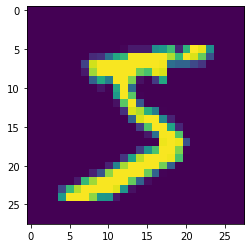

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train.shape

torch.Size([60000, 28, 28])

In [ ]:
# We have: 60000 images 28x28
# We want to have 60000 x 1 x 28 x 28

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        # Conv2d - we are working with 2-dem image
        # padding = 2 becouse of initial size of our image consist of 28x28 pixels
        # and we want to get image 28x28 after the convolution layer
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh() # image: 28x28
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2) # image: 14x14

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh() # image: 10x10
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2) # image: 5x5

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        # torch.view changed size of the object
        # creating from 4d(batchsize, deep, hight, width) vector 2d vector 
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [ ]:
# creating device

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [ ]:
# choosing loss-function and optimizer

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    # argmax - becouse we didn't do softmax f/a and we need to consider
    # max value of answers rather whem corresponding probabilities
    # we use .float to have an opportunity to use .mean function
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9630)
tensor(0.9690)
tensor(0.9732)
tensor(0.9773)
tensor(0.9766)
tensor(0.9774)
tensor(0.9794)
tensor(0.9810)
tensor(0.9799)
tensor(0.9790)
tensor(0.9796)
tensor(0.9824)
tensor(0.9849)
tensor(0.9841)
tensor(0.9823)
tensor(0.9820)
tensor(0.9819)
tensor(0.9824)
tensor(0.9795)
tensor(0.9831)
tensor(0.9844)
tensor(0.9826)
tensor(0.9813)
tensor(0.9831)
tensor(0.9846)
tensor(0.9812)
tensor(0.9780)
tensor(0.9811)
tensor(0.9841)
tensor(0.9831)
tensor(0.9838)
tensor(0.9844)
tensor(0.9819)
tensor(0.9841)
tensor(0.9796)
tensor(0.9785)
tensor(0.9817)
tensor(0.9785)
tensor(0.9800)
tensor(0.9839)
tensor(0.9827)
tensor(0.9831)
tensor(0.9790)
tensor(0.9757)


KeyboardInterrupt: ignored

In [ ]:
lenet5.forward(X_test)

tensor([[-10.6457,  -3.0336,  -0.1218,  ...,  33.3861, -14.2800,   1.4772],
        [ 11.0972,  11.4731,  28.9220,  ...,  -8.4921,   3.4209, -11.6921],
        [ -6.5116,  31.2919,  -6.7950,  ...,   2.7284,   7.9858, -15.1870],
        ...,
        [-14.1183,  -5.7387,  -7.8288,  ...,  -4.3083,   2.3096,   5.5305],
        [ -3.1971,  -1.0055, -19.5228,  ..., -10.3060,   7.7598,  -4.2998],
        [  4.4396,  -7.0364,   6.2665,  ..., -19.7339,  -1.1455,  -4.8255]],
       device='cuda:0', grad_fn=<AddmmBackward>)

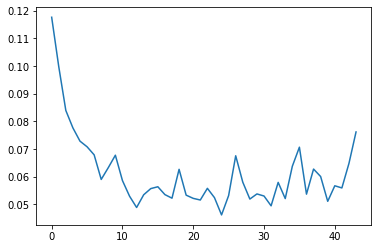

In [ ]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);

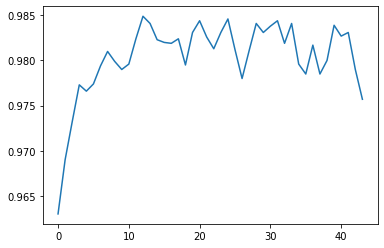

In [ ]:
plt.plot(test_accuracy_history);